<a href="https://colab.research.google.com/github/rtajeong/Hallym_univ_M34/blob/main/hallym_lab4_nonlinear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nonlinear Regression


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

12.669568712474018 0.7641571017007062


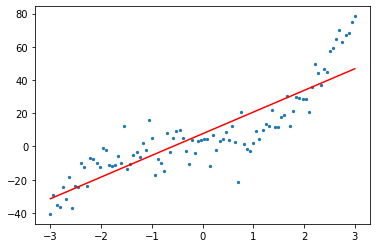

In [19]:
# data generation
x = np.linspace(-3, 3, 100)
y = 2.1 * x**3 + 2.1 * x**2 + 1.4 * x + 0.9
y = y + np.random.randn(100) * 7.2
plt.scatter(x, y, s=5)

# linear model
lrg = LinearRegression()
lrg.fit(x.reshape(-1,1), y)
y_pred = lrg.predict(x.reshape(-1,1))
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = lrg.score(x.reshape(-1,1), y)
print(rmse, r2)

a, b = lrg.coef_, lrg.intercept_
xx = np.linspace(-3,3, 100)
yy = a * xx + b
plt.plot(xx, yy, c='r')

[13.03581053  2.32642819] 0.5592614681711146
10.953146943515716 0.8237305826573768


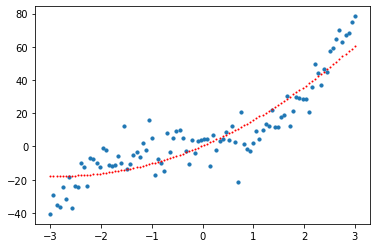

In [29]:
# nonlinear (degree 2)
poly_f = PolynomialFeatures(degree = 2, include_bias = False)
x_poly = poly_f.fit_transform(x.reshape(-1,1))
# x[:5], x_poly[:5]
lrg = LinearRegression()
lrg.fit(x_poly, y)
print(lrg.coef_, lrg.intercept_)
y_pred = lrg.predict(x_poly)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = lrg.score(x_poly, y)
print(rmse, r2)

plt.scatter(x, y, s=10)
plt.scatter(x, y_pred, c='r', s=1)

In [31]:
# nonlinear (degree 3)
poly_f = PolynomialFeatures(degree = 3, include_bias = False)
x_poly = poly_f.fit_transform(x.reshape(-1,1))
x[:5], x_poly[:5]

(array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576]),
 array([[ -3.        ,   9.        , -27.        ],
        [ -2.93939394,   8.64003673, -25.3964716 ],
        [ -2.87878788,   8.28741965, -23.85772324],
        [ -2.81818182,   7.94214876, -22.38241923],
        [ -2.75757576,   7.60422406, -20.96922392]]))

[2.12806934 2.32642819 1.98021708] 0.5592614681711128
7.1181350204142255 0.9255556771008755


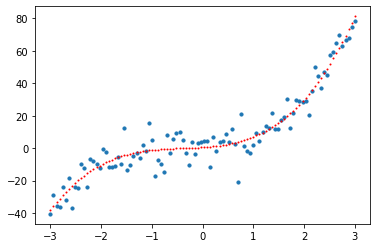

In [32]:
lrg = LinearRegression()
lrg.fit(x_poly, y)
print(lrg.coef_, lrg.intercept_)
y_pred = lrg.predict(x_poly)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = lrg.score(x_poly, y)
print(rmse, r2)

plt.scatter(x, y, s=10)
plt.scatter(x, y_pred, c='r', s=1)

5.933194699436999 0.9482778772084932


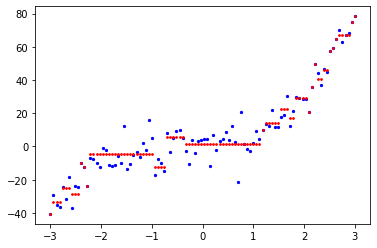

In [48]:
# decisiontree regressor
from sklearn.tree import DecisionTreeRegressor
dtrg = DecisionTreeRegressor(max_depth=5)
dtrg.fit(x.reshape(-1,1), y)
y_pred = dtrg.predict(x.reshape(-1,1))
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = dtrg.score(x.reshape(-1,1), y)
print(rmse, r2)

plt.scatter(x, y, c='b', s=5)
plt.scatter(x, y_pred, c='r', s=3)

3.325772458338944 0.9837488459999707


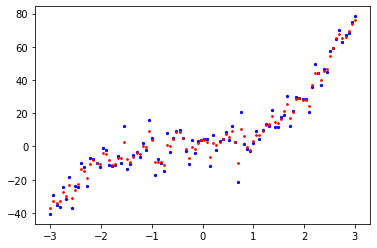

In [59]:
# randomforest regressor
from sklearn.ensemble import RandomForestRegressor
rfrg = RandomForestRegressor(n_estimators=200)
rfrg.fit(x.reshape(-1,1), y)
y_pred = rfrg.predict(x.reshape(-1,1))
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = rfrg.score(x.reshape(-1,1), y)
print(rmse, r2)

plt.scatter(x, y, c='b', s=5)
plt.scatter(x, y_pred, c='r', s=3)

6.4664578740068706 0.9385627106321691


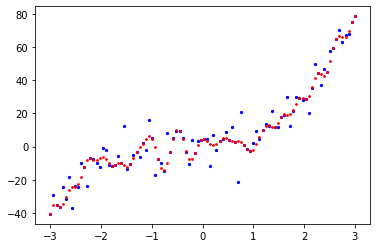

In [55]:
# svm regoressor
from sklearn.svm import SVR
svrg = SVR(C=10000, kernel='rbf', gamma=10)
svrg.fit(x.reshape(-1,1), y)
y_pred = svrg.predict(x.reshape(-1,1))

rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = svrg.score(x.reshape(-1,1), y)
print(rmse, r2)

plt.scatter(x, y, c='b', s=5)
plt.scatter(x, y_pred, c='r', s=3)